# MODELS BUILDING, TRAINING AND TESTING- NOUAR Alexandre & DURA Théo

## Imports and data :

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import pickle
import matplotlib.pyplot

import mlflow
import mlflow.xgboost

In [51]:
df_train = pd.read_csv('../data/processed/train_data.csv')
df_test = pd.read_csv('../data/processed/test_data.csv')

In [52]:
X = df_train.drop(columns = ['TARGET', 'Unnamed: 0'])
Y = df_train['TARGET']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

x_totest = df_test.drop(columns=['Unnamed: 0'])

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(117777, 216) (39259, 216) (117777,) (39259,)


## XGBOOST :

In [1]:
from xgboost import XGBClassifier

In [108]:
XGB = XGBClassifier(objective = "binary:logistic",eval_metric="mlogloss", use_label_encoder=False)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [109]:
y_pred_xgb = XGB.predict(X_test)

print(XGB.score(X_test,y_test))

0.9284240556305561


In [114]:
from sklearn.metrics import classification_report, confusion_matrix

cmXGB = confusion_matrix(y_test,y_pred_xgb)

print(cmXGB[0])

[36364   124]


<AxesSubplot:>

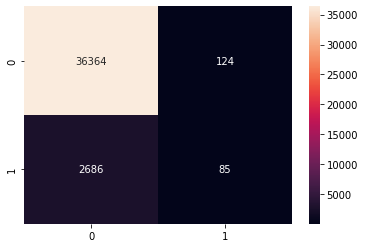

In [124]:
sb.heatmap(cmXGB,annot=True, fmt='g')


## RANDOM FOREST :

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [88]:
y_pred_rfc = RFC.predict(X_test)

print(RFC.score(X_test,y_test))

0.9294684021498255


<AxesSubplot:>

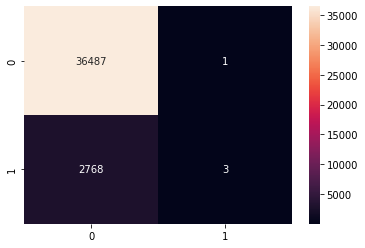

In [96]:
from sklearn.metrics import confusion_matrix

cmRFC = confusion_matrix(y_test,y_pred_rfc)

sb.heatmap(cmRFC,annot=True, fmt ='g')

## GRADIENT BOOSTING :

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
y_pred_GBC = GBC.predict(X_test)

print(GBC.score(X_test,y_test))

0.9292646272192363


<AxesSubplot:>

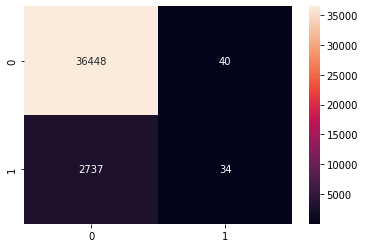

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

cmGBC = confusion_matrix(y_test,y_pred_GBC)

sb.heatmap(cmGBC,annot=True, fmt='g')